# Veri Temizleme (Data Cleaning/Cleasing)
### Gürültülü Veri (Noisy Data)
### Eksik Veri Analizi (Misssing Data Analysis)
### Aykırı Gözlem Analizi (Outlier Analysis)

![Gürültülü Veri](./images/picture.png)
 Gürültü : Yanlış veriler

 Bir bebek biberonun 1.000.000 TL olmsı gibi

# Veri Standardizasyonu(Data Standardization, Feature Scaling)
##### 0-1 Dönüşümü (Normalization)
##### z-skoruna Dönüştürme (Standardization)
###### Logaritmik Dönüşüm(Log Transformation)

# Veri İndirgeme (Data Reducation)
#### Gözlem (Observation) Sayısının Azaltılması
#### Değişken (Variable) Sayısının azaltılması 

# Değişken Dönüşümleri (Variable Transformation)
#### Sürekli değişkenlerde dönüşümler
### Kategorik değişkenlerde dönüşümler

In [1]:
import seaborn as sns

# 'diamonds' veri setini Seaborn kütüphanesinden yükle
df = sns.load_dataset('diamonds')

# Sadece 'float64' ve 'int64' veri tipine sahip sütunları seç
df = df.select_dtypes(include=['float64', 'int64'])

# Veri setinden herhangi bir eksik değere (NaN) sahip olan satırları çıkar
df = df.dropna()

# İlk 5 satırı görüntüle
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"] #Table sütunun seç

In [3]:
df_table.head() #ilk 5 gözleme ulaş

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

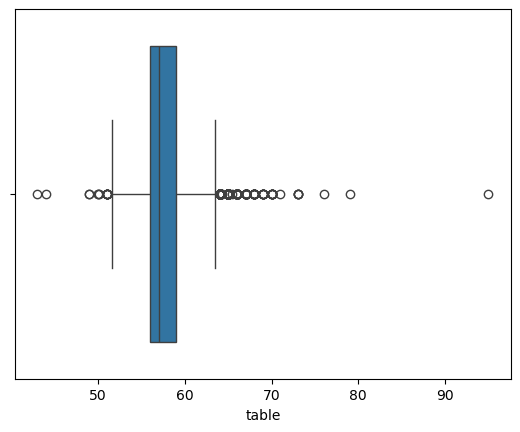

In [4]:
sns.boxplot(x = df_table); #Boxplot yöntemi ile aykırı verileri tespit et

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [10]:
alt_sinir

51.5

In [14]:
ust_sinir

63.5

In [21]:
(df_table < alt_sinir ) | (df_table > ust_sinir )

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
aykiri_tf = df_table < alt_sinir 

In [25]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [27]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [29]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

In [33]:
import pandas as pd

In [35]:
type(df_table)

pandas.core.series.Series

In [37]:
df_table = pd.DataFrame(df_table)

In [39]:
df_table.shape

(53940, 1)

In [41]:
t_df = df_table[~(((df_table < alt_sinir) |(df_table > ust_sinir))).any(axis = 1)] #aykırı olmayan değerler alınıyor sonra haricinde işlem yapılıyor

In [43]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


## Ortalamaa ile doldurma

In [46]:
df_table[aykiri_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [48]:
df_table[aykiri_tf] = df_table.mean()

In [50]:
df_table[aykiri_tf]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


## Baskılama Yöntemi

In [53]:
import seaborn as sns

# 'diamonds' veri setini Seaborn kütüphanesinden yükle
df = sns.load_dataset('diamonds')

# Sadece 'float64' ve 'int64' veri tipine sahip sütunları seç
df = df.select_dtypes(include=['float64', 'int64'])

# Veri setinden herhangi bir eksik değere (NaN) sahip olan satırları çıkar
df = df.dropna()

# İlk 5 satırı görüntüle
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df_table = df["table"] #Table sütunun seç

In [57]:
df_table [aykiri_tf] 

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [59]:
alt_sinir

51.5

In [61]:
df_table[aykiri_tf] = alt_sinir

C:\Users\hafize.ogut\AppData\Local\Temp\ipykernel_17248\3246625175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [63]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi
# Local Outlier Factor
###### Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor

###### Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor Eğer bir Nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değer şeklinde değerlendiriliyor.

In [66]:
import seaborn as sns

# 'diamonds' veri setini Seaborn kütüphanesinden yükle
df = sns.load_dataset('diamonds')

# Sadece 'float64' ve 'int64' veri tipine sahip sütunları seç
df = df.select_dtypes(include=['float64', 'int64'])

# Veri setinden herhangi bir eksik değere (NaN) sahip olan satırları çıkar
df = df.dropna()

# İlk 5 satırı görüntüle
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [68]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [69]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [72]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [73]:
df_scores = clf.negative_outlier_factor_ #adesi, her bir veri noktasının negatif LOF (Local Outlier Factor) skorlarını içeren bir dizi oluşturur; bu skorlar, veri noktalarının aykırılık derecesini gösterir.

In [74]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [76]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [80]:
np.sort(df_scores)  # Negatif LOF skorlarını küçükten büyüğe sıralar, en düşük değerler en aykırı olanları gösterir.

array([-8.60430658, -8.20889984, -5.86084355, ..., -0.9162733 ,
       -0.91366494, -0.91247688])

In [82]:
esik_deger = np.sort(df_scores)[13]

In [84]:
esik_deger

-3.823787967755565

In [86]:
aykiri_tf = df_scores > esik_deger aykiri_tf = df_scores > esik_deger  # Negatif LOF skorlarını eşik değeriyle karşılaştırarak aykırı olup olmadıklarını True/False olarak belirler.


SyntaxError: invalid syntax (3679612551.py, line 1)

In [88]:
aykiri_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [90]:
#aykırı olmayan değerler erişiliyor

yeni_df = df[df_scores > esik_deger]

In [92]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [94]:
yeni_df = df[df_scores < esik_deger]

In [96]:
yeni_df

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
